### Import the necesary Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D


# Task 1: Merging All the Data into a single File

In [2]:
#Accessing the files from the directory
files = [file for file in os.listdir('C:/Users/JOB/Desktop/Data/SalesAnalysis/Sales_Data')]
for file in files:
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
#Lets take these files and concatenate them to make a single csv
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('C:/Users/JOB/Desktop/Data/SalesAnalysis/Sales_Data/'+file)
    all_data = pd.concat([all_data, df])

    
all_data.to_csv('all_data.csv', index = False)

### EDA

In [4]:
#Reading the updated dataframe
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.shape

(186850, 6)

In [6]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [7]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

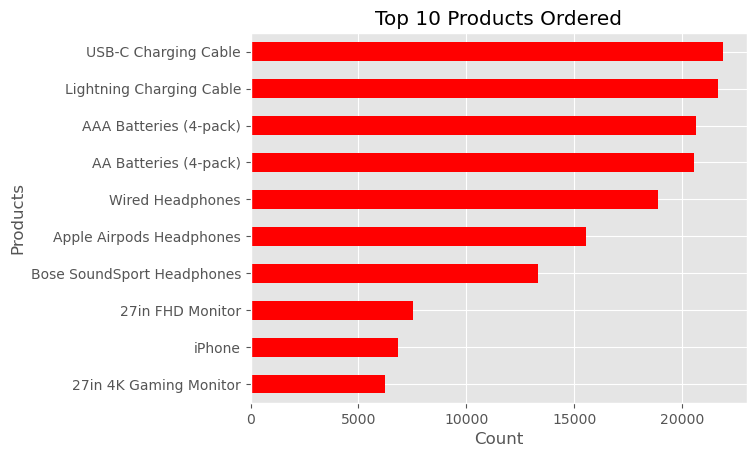

In [8]:
df = all_data[['Product', 'Price Each']]
ax = df['Product'].value_counts()\
    .head(10)\
    .plot(kind = 'barh', color = 'red', title = "Top 10 Products Ordered")
ax.set_xlabel('Count')
ax.set_ylabel('Products')
ax.invert_yaxis()


## Cleaning The data

###### 1 Removing NANs

In [9]:
#Removing NANs
all_data.isna().sum()
all_data = all_data.dropna(how='all')
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

###### 2 Removing String 'Or'

In [10]:
#Find 'Or' and remove it
df = all_data[all_data['Order Date'].str[0:2]=='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
#Data with the 'Or' Removed
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']

##### 3 Convert Columns to their correct Types

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make Int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make Float

## Engineering additional Features

###### New Month Column

Since we dont have a specific column for months, we will need to augment the dataframe and add some additional columns. Although we have an order date we dont have the month in a separate column. Therefore we will engeneer a specific column feature name 'Month'.

In [13]:
#New Month Column
all_data['Month'] = all_data['Order Date'].str[0:2]
#converting the Month from sring to integer type
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### New Revenues Column

In [14]:
all_data['Revenues'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenues
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### New City Column

Nested right in the middle of the Purchase Address column, is the City and State Name. We will extract this value and create a new city feature based on that.

In [15]:
#Use the.apply() function
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenues,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


##### Convert Order Date Feature into datetime and add an Hour Feature

In [16]:
all_data['Order date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenues,City,Order date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00


In [17]:
all_data = all_data.drop('Order Date', axis = 1)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Revenues,City,Order date
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00


In [18]:
#Adding the Hour Column
all_data['Hour'] = all_data['Order date'].dt.hour
all_data['Minute'] = all_data['Order date'].dt.minute
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Revenues,City,Order date,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,9,27


# Task 2: Data Analysis Questions 

### Question 1: Which month had the highest Revenueses and by how much?

In [19]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Revenues,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


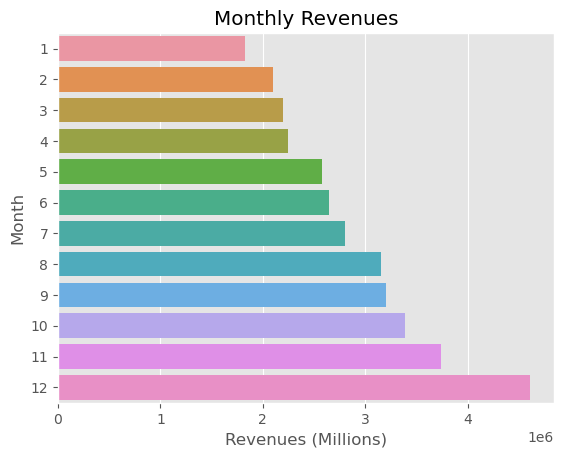

In [20]:
month = list(range(1, 13))
month.reverse()

# Sort the results DataFrame by 'Revenues' column in descending order
sorted_results = results.sort_values('Revenues', ascending=False)

# Create the horizontal bar chart using seaborn
sns.barplot(x='Revenues', y=month, data=sorted_results, orient='h')

plt.xlabel('Revenues (Millions)')
plt.ylabel('Month')
plt.title('Monthly Revenues')

plt.show()

From the above it is clear that the month (12) December, ahd the highest sales, wile month (1) January, had the lowest. This could be driven by numerous factors, especially the fact that December is usually the Festive seaon and most people tend to spend more, probably for holidays

### Question 2: What US City had the highest amount of Revenues Generated?

In [21]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Revenues,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland (ME),2750,447189.25,17144,449758.27,35211,72856
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477


<function matplotlib.pyplot.show(close=None, block=None)>

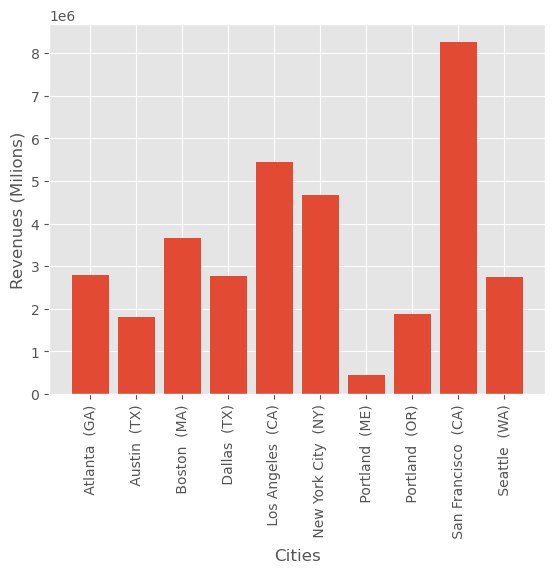

In [22]:
city = [city for city, df in all_data.groupby('City')]
plt.bar(city, results['Revenues'])
plt.xticks(city, rotation = 'vertical')
plt.ylabel('Revenues (Milions)')
plt.xlabel('Cities')
plt.show

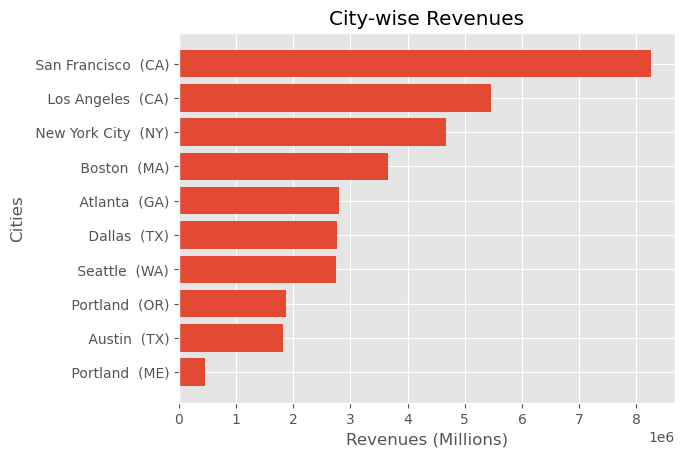

In [23]:
city = [city for city, df in all_data.groupby('City')]
revenues = results['Revenues']

# Sort the cities based on revenues in ascending order
sorted_data = sorted(zip(city, revenues), key=lambda x: x[1])
sorted_city, sorted_revenues = zip(*sorted_data)

# Create the horizontal bar plot using Matplotlib
plt.barh(sorted_city, sorted_revenues)

plt.xlabel('Revenues (Millions)')
plt.ylabel('Cities')
plt.title('City-wise Revenues')

plt.show()

C:\Users\JOB\AppData\Local\Temp\ipykernel_888\3635316058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_data['Month'] = top_data['Month'].apply(lambda x: month_names[x-1]).astype(month_order)


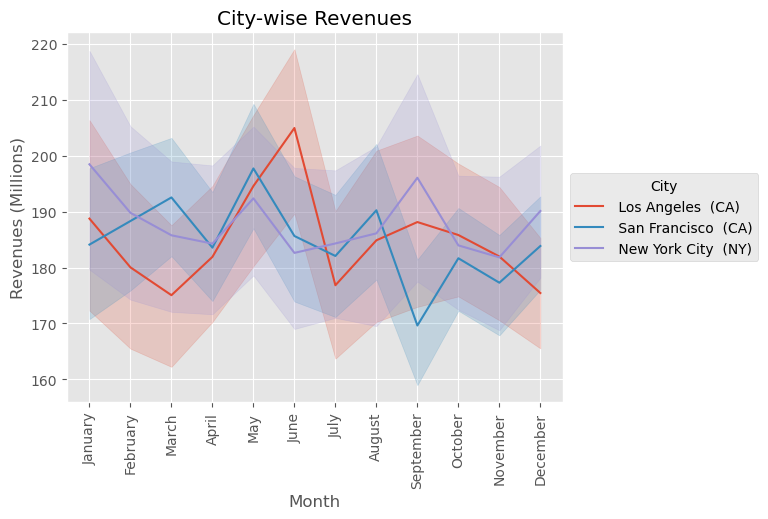

In [24]:
# Select the top 3 cities with the largest revenues
top_cities = all_data.groupby('City')['Revenues'].sum().nlargest(3).index
top_data = all_data[all_data['City'].isin(top_cities)]

# Convert the month numbers to month names and set the order
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_order = pd.CategoricalDtype(month_names, ordered=True)
top_data['Month'] = top_data['Month'].apply(lambda x: month_names[x-1]).astype(month_order)

# Create the line plot using Seaborn with hue
sns.lineplot(data=top_data, x='Month', y='Revenues', hue='City')

plt.xlabel('Month')
plt.ylabel('Revenues (Millions)')
plt.title('City-wise Revenues')

plt.xticks(rotation='vertical')
plt.legend(title='City', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Question 3: What is the best time to advertise (For maximum probability of Customers' purchase)

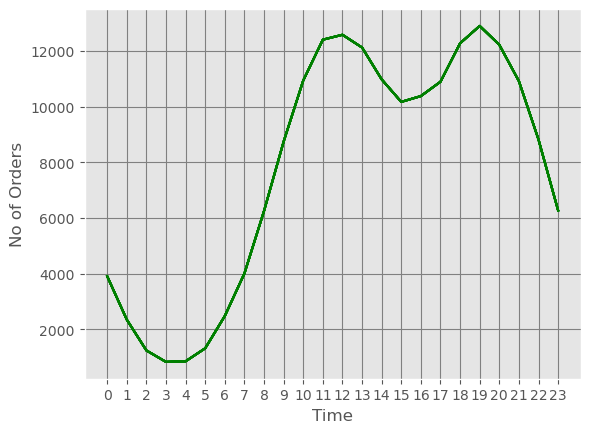

In [25]:
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count(), color='green')
plt.xticks(hours)
plt.grid(color='grey')  # Set gridlines color to black
plt.xlabel('Time')
plt.ylabel('No of Orders')
plt.show()


In [26]:
#Since this Data is for all cities we can do specific charts for all cities

### Question 4: What Products are most often sold together?

In [27]:
duplicates = all_data[all_data['Order ID'].duplicated(keep = False)]
duplicates.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Revenues,City,Order date,Hour,Minute
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38
18,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-03 19:42:00,19,42
19,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),2019-04-03 19:42:00,19,42
30,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 11:31:00,11,31


In [28]:
duplicates['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicates.head()

C:\Users\JOB\AppData\Local\Temp\ipykernel_888\2694303729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Revenues,City,Order date,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-03 19:42:00,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),2019-04-03 19:42:00,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 11:31:00,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [29]:
duplicates = duplicates[['Order ID','Grouped']].drop_duplicates()
duplicates.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [30]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in duplicates['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))


    
for i, value in count.most_common(10):
    print(i,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Quesion 5:What was the most sold Product, What Might be the reason?

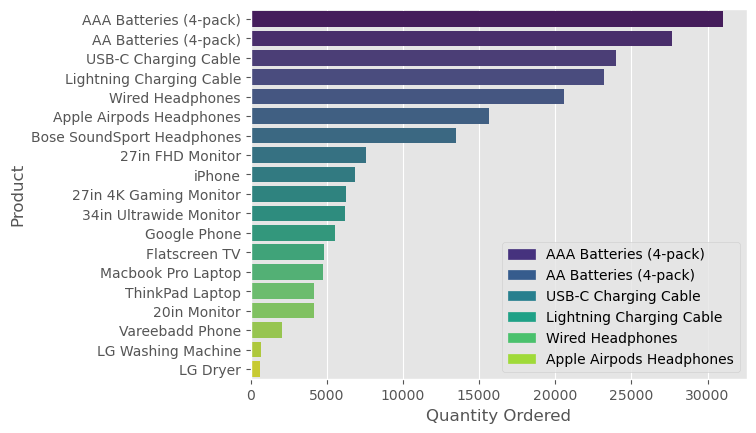

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

product_group = all_data.groupby('Product')
qty_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

# Create a DataFrame for plotting
data = pd.DataFrame({'Product': products, 'Quantity Ordered': qty_ordered})
data_sorted = data.sort_values(by='Quantity Ordered', ascending=False)

# Create the horizontal bar plot using Seaborn
sns.barplot(x='Quantity Ordered', y='Product', data=data_sorted, palette='viridis')

# Create a color legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette('viridis')]
labels = data_sorted['Product']
plt.legend(handles, labels)

plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


### Question 6: What is the relationship of these most sold products and their prices?

In [32]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\JOB\AppData\Local\Temp\ipykernel_888\3529342392.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


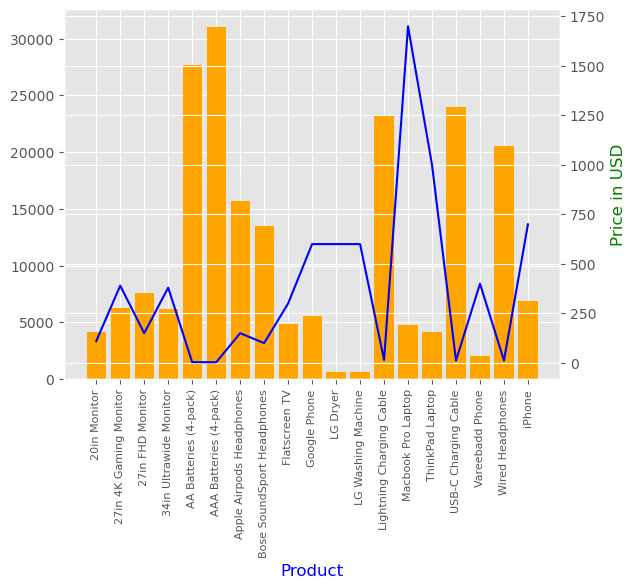

In [33]:
fig, ax1 = plt.subplots()
ax2 = plt.twinx()
ax1.bar(products,qty_ordered, color = 'orange')
ax2.plot(products,prices, 'b-') 
ax1.set_xlabel('Product', color = 'blue')
ax2.set_ylabel('Qty', color = 'blue')
ax2.set_ylabel('Price in USD', color = 'g')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()



From the above plot, it is clear that although AAA and AA 4-Pack Batteries were the most sold products, their prices were also among the lowest in this most-sold category. On the other hand, the Macbook Pro Laptop was among the least sold commodities. Its price however was the highest.Although the Hypotheseis that less expensive products were the most sold and vice versa might be true but other factors like the need frquency and durability of the product also play a part on the demad. This is best excemplified by the relatively lower demand for Google Phone, Flat screen TV, LG Dryer, LG Washing Machine and Vareebadd Phone that also have relaitively lower prices.